In [1]:
%cd /content
!pip install kaggle

from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d jinn0135/temp-sign


/content
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json
 99% 238M/240M [00:02<00:00, 132MB/s] 
100% 240M/240M [00:02<00:00, 111MB/s]


In [2]:
!unzip -q temp-sign.zip -d temp-sign/ 
root = '/content/temp_sign/Temp/'

In [3]:
!pip install -U openmim
!mim install mmengine
!mim install 'mmcv>=2.0.0rc1'|
!mim install 'mmdet>=3.0.0rc0'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 2.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 372.1/372.1 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.9/200.9 kB 23.8 MB/s eta 0:00:00
/bin/bash: -c: line 1: syntax error: unexpected end of file
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.4/74.4 MB 6.2 MB/s eta 0:00:00


In [4]:
import mmcv
import matplotlib.pyplot as plt


In [5]:
!git clone https://github.com/open-mmlab/mmocr.git
%cd mmocr
!pip install -v -e .
# "-v" increases pip's verbosity.
# "-e" means installing the project in editable mode,
# That is, any local modifications on the code will take effect immediately.

Cloning into 'mmocr'...
remote: Enumerating objects: 16277, done.
remote: Counting objects: 100% (188/188), done.
remote: Compressing objects: 100% (144/144), done.
remote: Total 16277 (delta 56), reused 138 (delta 42), pack-reused 16089
Receiving objects: 100% (16277/16277), 16.19 MiB | 20.77 MiB/s, done.
Resolving deltas: 100% (10722/10722), done.
/content/mmocr
Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/mmocr
  Running command python setup.py egg_info
  running egg_info
  creating /tmp/pip-pip-egg-info-_b11qs8k/mmocr.egg-info
  writing /tmp/pip-pip-egg-info-_b11qs8k/mmocr.egg-info/PKG-INFO
  writing dependency_links to /tmp/pip-pip-egg-info-_b11qs8k/mmocr.egg-info/dependency_links.txt
  writing requirements to /tmp/pip-pip-egg-info-_b11qs8k/mmocr.egg-info/requires.txt
  writing top-level names to /tmp/pip-pip-egg-info-_b11q

In [6]:
from mmocr.datasets import OCRDataset
from mmengine.registry import init_default_scope
from mmocr.apis import MMOCRInferencer
from mmengine.runner import Runner
import time
import mmcv
import matplotlib.pyplot as plt

In [1]:
from mmengine import Config
cfg = Config.fromfile('/content/mmocr/configs/textdet/panet/panet_resnet18_fpem-ffm_600e_icdar2015.py')

In [2]:
cfg.keys()

dict_keys(['icdar2015_textdet_data_root', 'icdar2015_textdet_train', 'icdar2015_textdet_test', 'default_scope', 'env_cfg', 'randomness', 'default_hooks', 'log_level', 'log_processor', 'load_from', 'resume', 'val_evaluator', 'test_evaluator', 'vis_backends', 'visualizer', 'optim_wrapper', 'train_cfg', 'val_cfg', 'test_cfg', 'param_scheduler', 'model', 'train_pipeline', 'test_pipeline', 'train_dataloader', 'val_dataloader', 'test_dataloader', 'auto_scale_lr'])

In [10]:
cfg.train_pipeline

[{'type': 'LoadImageFromFile', 'color_type': 'color_ignore_orientation'},
 {'type': 'LoadOCRAnnotations',
  'with_polygon': True,
  'with_bbox': True,
  'with_label': True},
 {'type': 'ShortScaleAspectJitter', 'short_size': 736, 'scale_divisor': 32},
 {'type': 'RandomFlip', 'prob': 0.5, 'direction': 'horizontal'},
 {'type': 'RandomRotate', 'max_angle': 10},
 {'type': 'TextDetRandomCrop', 'target_size': (736, 736)},
 {'type': 'Pad', 'size': (736, 736)},
 {'type': 'TorchVisionWrapper',
  'op': 'ColorJitter',
  'brightness': 0.12549019607843137,
  'saturation': 0.5},
 {'type': 'PackTextDetInputs',
  'meta_keys': ('img_path', 'ori_shape', 'img_shape', 'scale_factor')}]

In [9]:
#cfg.param_scheduler[1] = {'type': 'MultiStepLR', 'milestones': [5,7], 'end': 10}

In [13]:
cfg.train_cfg

{'type': 'EpochBasedTrainLoop', 'max_epochs': 10, 'val_interval': 20}

In [31]:
#cfg.param_scheduler[0]/content/mmocr/configs/textdet/dbnetpp/dbnetpp_resnet50-dcnv2_fpnc_1200e_icdar2015.py

{'type': 'LinearLR', 'end': 500, 'start_factor': 0.001, 'by_epoch': False}

In [148]:
cfg.optim_wrapper.optimizer.lr = 0.0001

In [149]:
cfg.optim_wrapper.optimizer

{'type': 'SGD', 'lr': 0.0001, 'momentum': 0.9, 'weight_decay': 0.0001}

In [10]:
# cfg.train_pipeline = [{'type': 'LoadImageFromFile', 'color_type': 'color_ignore_orientation'},
#  {'type': 'LoadOCRAnnotations',
#   'with_polygon': True,
#   'with_bbox': True,
#   'with_label': True},
#  {'type': 'TorchVisionWrapper',
#   'op': 'ColorJitter',
#   'brightness': 0.12549019607843137,
#   'saturation': 0.5,
#   'contrast': 0.5},
#  {'type': 'RandomResize',
#   'scale': (640, 640),
#   'ratio_range': (1.0, 4.125),
#   'keep_ratio': True},
#  {'type': 'RandomFlip', 'prob': 0.8},
#  {'type': 'TextDetRandomCrop', 'target_size': (640, 640)},
#  {'type': 'MMOCR2MMDet', 'poly2mask': True},
#  {'type': 'mmdet.PackDetInputs',
#   'meta_keys': ('img_path',
#    'ori_shape',
#    'img_shape',
#    'flip',
#    'scale_factor',
#    'flip_direction')}]

In [11]:
cfg.work_dir = 'work_dirs/test/'

In [12]:
cfg.train_cfg.max_epochs = 10

In [131]:
#cfg.train_dataloader.batch_size = 5

In [14]:
data_root = '/content/temp-sign/kaggle_ko_sign/Temp/'

In [15]:
cfg.icdar2015_textdet_train

{'type': 'OCRDataset',
 'data_root': 'data/icdar2015',
 'ann_file': 'textdet_train.json',
 'filter_cfg': {'filter_empty_gt': True, 'min_size': 32},
 'pipeline': [{'type': 'LoadImageFromFile',
   'color_type': 'color_ignore_orientation'},
  {'type': 'LoadOCRAnnotations',
   'with_polygon': True,
   'with_bbox': True,
   'with_label': True},
  {'type': 'ShortScaleAspectJitter', 'short_size': 736, 'scale_divisor': 32},
  {'type': 'RandomFlip', 'prob': 0.5, 'direction': 'horizontal'},
  {'type': 'RandomRotate', 'max_angle': 10},
  {'type': 'TextDetRandomCrop', 'target_size': (736, 736)},
  {'type': 'Pad', 'size': (736, 736)},
  {'type': 'TorchVisionWrapper',
   'op': 'ColorJitter',
   'brightness': 0.12549019607843137,
   'saturation': 0.5},
  {'type': 'PackTextDetInputs',
   'meta_keys': ('img_path', 'ori_shape', 'img_shape', 'scale_factor')}]}

In [16]:
cfg.icdar2015_textdet_data_root = data_root + 'temp_Sign'

In [17]:
cfg.icdar2015_textdet_train.data_root = data_root + 'temp_Sign'
cfg.icdar2015_textdet_train.ann_file = data_root + 'temp_train_annotation.json'

In [18]:
cfg.icdar2015_textdet_test.data_root = data_root + 'temp_Sign'
cfg.icdar2015_textdet_test.ann_file = data_root + 'temp_test_annotation.json'

In [19]:
cfg.test_dataloader

{'batch_size': 1,
 'num_workers': 4,
 'persistent_workers': True,
 'sampler': {'type': 'DefaultSampler', 'shuffle': False},
 'dataset': {'type': 'OCRDataset',
  'data_root': 'data/icdar2015',
  'ann_file': 'textdet_test.json',
  'test_mode': True,
  'pipeline': [{'type': 'LoadImageFromFile',
    'color_type': 'color_ignore_orientation'},
   {'type': 'ShortScaleAspectJitter',
    'short_size': 736,
    'scale_divisor': 1,
    'ratio_range': (1.0, 1.0),
    'aspect_ratio_range': (1.0, 1.0)},
   {'type': 'LoadOCRAnnotations',
    'with_polygon': True,
    'with_bbox': True,
    'with_label': True},
   {'type': 'PackTextDetInputs',
    'meta_keys': ('img_path', 'ori_shape', 'img_shape', 'scale_factor')}]}}

In [20]:
cfg.train_dataloader.num_workers = 1
cfg.train_dataloader.batch_size = 5
cfg.train_dataloader.dataset.data_root = data_root + 'temp_Sign'
cfg.train_dataloader.dataset.ann_file = data_root + 'temp_train_annotation.json'

In [21]:
cfg.test_dataloader.num_workers = 1
cfg.test_dataloader.dataset.data_root = data_root + 'temp_Sign'
cfg.test_dataloader.dataset.ann_file = data_root + 'temp_test_annotation.json'

In [22]:
cfg.val_dataloader.num_workers = 1
cfg.val_dataloader.dataset.data_root = data_root + 'temp_Sign'
cfg.val_dataloader.dataset.ann_file = data_root + 'temp_test_annotation.json'

In [161]:
cfg.train_dataloader.dataset.datasets = [{'type': 'OCRDataset',
  'data_root': '/content/temp-sign/kaggle_ko_sign/Temp/temp_Sign',
  'ann_file': '/content/temp-sign/kaggle_ko_sign/Temp/temp_train_annotation.json',
  'filter_cfg': {'filter_empty_gt': True, 'min_size': 32},
  'pipeline': None}]

In [162]:
cfg.val_dataloader.dataset.datasets = [{'type': 'OCRDataset',
  'data_root': '/content/temp-sign/kaggle_ko_sign/Temp/temp_Sign',
  'ann_file': '/content/temp-sign/kaggle_ko_sign/Temp/temp_test_annotation.json',
  'filter_cfg': {'filter_empty_gt': True, 'min_size': 32},
  'pipeline': None}]

In [163]:
cfg.test_dataloader.dataset.datasets = [{'type': 'OCRDataset',
  'data_root': '/content/temp-sign/kaggle_ko_sign/Temp/temp_Sign',
  'ann_file': '/content/temp-sign/kaggle_ko_sign/Temp/temp_test_annotation.json',
  'filter_cfg': {'filter_empty_gt': True, 'min_size': 32},
  'pipeline': None}]

In [164]:
cfg.train_list = [{'type': 'OCRDataset',
  'data_root': '/content/temp-sign/kaggle_ko_sign/Temp/temp_Sign',
  'ann_file': '/content/temp-sign/kaggle_ko_sign/Temp/temp_train_annotation.json',
  'filter_cfg': {'filter_empty_gt': True, 'min_size': 32},
  'pipeline': None}]

In [165]:
cfg.test_list = [{'type': 'OCRDataset',
  'data_root': '/content/temp-sign/kaggle_ko_sign/Temp/temp_Sign',
  'ann_file': '/content/temp-sign/kaggle_ko_sign/Temp/temp_test_annotation.json',
  'test_mode': True,
  'pipeline': None}]

In [94]:
# cfg.train_dataloader.dataset.data_prefix.img_path = ''
# cfg.val_dataloader.dataset.data_prefix.img_path = ''
# cfg.test_dataloader.dataset.data_prefix.img_path = ''


In [ ]:
cfg.icdar2015_textdet_train

In [53]:
cfg.train_dataloader.keys()

dict_keys(['batch_size', 'num_workers', 'persistent_workers', 'sampler', 'dataset'])

In [115]:
cfg.train_cfg.type

'EpochBasedTrainLoop'

In [23]:
from mmengine.runner import Runner

runner = Runner.from_cfg(cfg)
runner.train()

05/18 07:31:39 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 1019983098
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 2.0.0+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


05/18 07:31:50 - mmengine - WARNING - The model and loaded state dict do not match exactly

size mismatch for layer1.0.conv1.weight: copying a param with shape torch.Size([64, 64, 3, 3]) from checkpoint, the shape in current model is torch.Size([64, 128, 3, 3]).
unexpected key in source state_dict: conv1.weight, bn1.running_mean, bn1.running_var, bn1.weight, bn1.bias, fc.weight, fc.bias

missing keys in source state_dict: stem.0.weight, stem.1.weight, stem.1.bias, stem.1.running_mean, stem.1.running_var, stem.3.weight, stem.4.weight, stem.4.bias, stem.4.running_mean, stem.4.running_var, stem.6.weight, stem.7.weight, stem.7.bias, stem.7.running_mean, stem.7.running_var, layer1.0.downsample.0.weight, layer1.0.downsample.1.weight, layer1.0.downsample.1.bias, layer1.0.downsample.1.running_mean, layer1.0.downsample.1.running_var

05/18 07:31:50 - mmengine - WARNING - "FileClient" will be deprecated in future. Please use io functions in https://mmengine.readthedocs.io/en/latest/api/fileio.ht

/content/mmocr/mmocr/models/textdet/module_losses/pan_module_loss.py:229: UserWarning: pos_num = 0 or neg_num = 0
  warnings.warn('pos_num = 0 or neg_num = 0')


05/18 07:32:05 - mmengine - INFO - Epoch(train)  [1][ 10/160]  lr: 1.0000e-03  eta: 0:39:23  time: 1.4867  data_time: 0.0730  memory: 5603  loss: 1.0996  loss_text: 0.5043  loss_kernel: 0.1736  loss_embedding: 0.4217
05/18 07:32:08 - mmengine - INFO - Epoch(train)  [1][ 15/160]  lr: 1.0000e-03  eta: 0:31:30  time: 0.6081  data_time: 0.0201  memory: 5603  loss: 1.0522  loss_text: 0.5037  loss_kernel: 0.1763  loss_embedding: 0.3722
05/18 07:32:12 - mmengine - INFO - Epoch(train)  [1][ 20/160]  lr: 1.0000e-03  eta: 0:28:41  time: 0.6924  data_time: 0.0439  memory: 5603  loss: 1.0016  loss_text: 0.4943  loss_kernel: 0.1760  loss_embedding: 0.3313
05/18 07:32:15 - mmengine - INFO - Epoch(train)  [1][ 25/160]  lr: 1.0000e-03  eta: 0:26:24  time: 0.7252  data_time: 0.0701  memory: 5603  loss: 1.0259  loss_text: 0.5207  loss_kernel: 0.1915  loss_embedding: 0.3136
05/18 07:32:18 - mmengine - INFO - Epoch(train)  [1][ 30/160]  lr: 1.0000e-03  eta: 0:24:38  time: 0.6459  data_time: 0.0475  memory

/usr/local/lib/python3.10/dist-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


05/18 07:32:32 - mmengine - INFO - Epoch(train)  [1][ 50/160]  lr: 1.0000e-03  eta: 0:21:42  time: 0.7535  data_time: 0.0697  memory: 5603  loss: 0.9468  loss_text: 0.4867  loss_kernel: 0.1759  loss_embedding: 0.2843
05/18 07:32:35 - mmengine - INFO - Epoch(train)  [1][ 55/160]  lr: 1.0000e-03  eta: 0:21:06  time: 0.6286  data_time: 0.0269  memory: 5603  loss: 0.9339  loss_text: 0.4891  loss_kernel: 0.1725  loss_embedding: 0.2723
05/18 07:32:38 - mmengine - INFO - Epoch(train)  [1][ 60/160]  lr: 1.0000e-03  eta: 0:20:33  time: 0.6033  data_time: 0.0194  memory: 5603  loss: 0.9438  loss_text: 0.4953  loss_kernel: 0.1701  loss_embedding: 0.2785
05/18 07:32:42 - mmengine - INFO - Epoch(train)  [1][ 65/160]  lr: 1.0000e-03  eta: 0:20:22  time: 0.6708  data_time: 0.0220  memory: 5603  loss: 0.9429  loss_text: 0.4967  loss_kernel: 0.1752  loss_embedding: 0.2709
05/18 07:32:46 - mmengine - INFO - Epoch(train)  [1][ 70/160]  lr: 1.0000e-03  eta: 0:20:29  time: 0.8194  data_time: 0.1040  memory

/usr/local/lib/python3.10/dist-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


05/18 07:32:59 - mmengine - INFO - Epoch(train)  [1][ 90/160]  lr: 1.0000e-03  eta: 0:19:25  time: 0.6211  data_time: 0.0202  memory: 5603  loss: 0.9085  loss_text: 0.4884  loss_kernel: 0.1711  loss_embedding: 0.2491
05/18 07:33:03 - mmengine - INFO - Epoch(train)  [1][ 95/160]  lr: 1.0000e-03  eta: 0:19:25  time: 0.7363  data_time: 0.0716  memory: 5603  loss: 0.9151  loss_text: 0.4939  loss_kernel: 0.1727  loss_embedding: 0.2486
05/18 07:33:07 - mmengine - INFO - Epoch(train)  [1][100/160]  lr: 1.0000e-03  eta: 0:19:11  time: 0.7321  data_time: 0.0785  memory: 5603  loss: 0.9107  loss_text: 0.4976  loss_kernel: 0.1746  loss_embedding: 0.2385
05/18 07:33:10 - mmengine - INFO - Epoch(train)  [1][105/160]  lr: 1.0000e-03  eta: 0:18:56  time: 0.6211  data_time: 0.0262  memory: 5603  loss: 0.9360  loss_text: 0.5133  loss_kernel: 0.1885  loss_embedding: 0.2342
05/18 07:33:13 - mmengine - INFO - Epoch(train)  [1][110/160]  lr: 1.0000e-03  eta: 0:18:42  time: 0.6120  data_time: 0.0172  memory

/usr/local/lib/python3.10/dist-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


05/18 07:33:46 - mmengine - INFO - Exp name: panet_resnet18_fpem-ffm_600e_icdar2015_20230518_073138
05/18 07:33:46 - mmengine - INFO - Epoch(train)  [1][160/160]  lr: 1.0000e-03  eta: 0:17:27  time: 0.6446  data_time: 0.0205  memory: 5603  loss: 0.9198  loss_text: 0.4953  loss_kernel: 0.1717  loss_embedding: 0.2528
05/18 07:33:50 - mmengine - INFO - Epoch(train)  [2][  5/160]  lr: 9.9850e-04  eta: 0:17:29  time: 0.7632  data_time: 0.0977  memory: 5603  loss: 0.9194  loss_text: 0.4951  loss_kernel: 0.1726  loss_embedding: 0.2517
05/18 07:33:54 - mmengine - INFO - Epoch(train)  [2][ 10/160]  lr: 9.9850e-04  eta: 0:17:21  time: 0.7358  data_time: 0.0936  memory: 5603  loss: 0.9231  loss_text: 0.5030  loss_kernel: 0.1754  loss_embedding: 0.2447
05/18 07:33:57 - mmengine - INFO - Epoch(train)  [2][ 15/160]  lr: 9.9850e-04  eta: 0:17:13  time: 0.6215  data_time: 0.0159  memory: 5603  loss: 0.9322  loss_text: 0.5060  loss_kernel: 0.1730  loss_embedding: 0.2531
05/18 07:34:00 - mmengine - INFO

/usr/local/lib/python3.10/dist-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


05/18 07:34:30 - mmengine - INFO - Epoch(train)  [2][ 65/160]  lr: 9.9850e-04  eta: 0:16:17  time: 0.6309  data_time: 0.0192  memory: 5603  loss: 0.9214  loss_text: 0.5025  loss_kernel: 0.1840  loss_embedding: 0.2349


/usr/local/lib/python3.10/dist-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


05/18 07:34:34 - mmengine - INFO - Epoch(train)  [2][ 70/160]  lr: 9.9850e-04  eta: 0:16:17  time: 0.7343  data_time: 0.0473  memory: 5603  loss: 0.8776  loss_text: 0.4741  loss_kernel: 0.1695  loss_embedding: 0.2340


/usr/local/lib/python3.10/dist-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/usr/local/lib/python3.10/dist-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


05/18 07:34:37 - mmengine - INFO - Epoch(train)  [2][ 75/160]  lr: 9.9850e-04  eta: 0:16:13  time: 0.7624  data_time: 0.0632  memory: 5603  loss: 0.8865  loss_text: 0.4782  loss_kernel: 0.1715  loss_embedding: 0.2368
05/18 07:34:41 - mmengine - INFO - Epoch(train)  [2][ 80/160]  lr: 9.9850e-04  eta: 0:16:07  time: 0.6627  data_time: 0.0363  memory: 5603  loss: 0.9211  loss_text: 0.5002  loss_kernel: 0.1738  loss_embedding: 0.2471
05/18 07:34:44 - mmengine - INFO - Epoch(train)  [2][ 85/160]  lr: 9.9850e-04  eta: 0:16:01  time: 0.6220  data_time: 0.0172  memory: 5603  loss: 0.9364  loss_text: 0.5104  loss_kernel: 0.1736  loss_embedding: 0.2525
05/18 07:34:47 - mmengine - INFO - Epoch(train)  [2][ 90/160]  lr: 9.9850e-04  eta: 0:15:57  time: 0.6536  data_time: 0.0241  memory: 5603  loss: 0.9339  loss_text: 0.5063  loss_kernel: 0.1713  loss_embedding: 0.2562
05/18 07:34:51 - mmengine - INFO - Epoch(train)  [2][ 95/160]  lr: 9.9850e-04  eta: 0:15:55  time: 0.7307  data_time: 0.0527  memory

/usr/local/lib/python3.10/dist-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


05/18 07:36:12 - mmengine - INFO - Epoch(train)  [3][ 55/160]  lr: 9.9699e-04  eta: 0:14:15  time: 0.6616  data_time: 0.0332  memory: 5603  loss: 0.8683  loss_text: 0.4939  loss_kernel: 0.1543  loss_embedding: 0.2201
05/18 07:36:15 - mmengine - INFO - Epoch(train)  [3][ 60/160]  lr: 9.9699e-04  eta: 0:14:11  time: 0.6392  data_time: 0.0175  memory: 5603  loss: 0.8535  loss_text: 0.4904  loss_kernel: 0.1633  loss_embedding: 0.1998
05/18 07:36:18 - mmengine - INFO - Epoch(train)  [3][ 65/160]  lr: 9.9699e-04  eta: 0:14:07  time: 0.6592  data_time: 0.0184  memory: 5603  loss: 0.8369  loss_text: 0.4705  loss_kernel: 0.1638  loss_embedding: 0.2026
05/18 07:36:22 - mmengine - INFO - Epoch(train)  [3][ 70/160]  lr: 9.9699e-04  eta: 0:14:05  time: 0.7227  data_time: 0.0304  memory: 5603  loss: 0.8197  loss_text: 0.4559  loss_kernel: 0.1601  loss_embedding: 0.2037
05/18 07:36:25 - mmengine - INFO - Epoch(train)  [3][ 75/160]  lr: 9.9699e-04  eta: 0:14:00  time: 0.7188  data_time: 0.0328  memory

/usr/local/lib/python3.10/dist-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


05/18 07:36:29 - mmengine - INFO - Epoch(train)  [3][ 80/160]  lr: 9.9699e-04  eta: 0:13:56  time: 0.6464  data_time: 0.0212  memory: 5603  loss: 0.7934  loss_text: 0.4426  loss_kernel: 0.1514  loss_embedding: 0.1994
05/18 07:36:32 - mmengine - INFO - Epoch(train)  [3][ 85/160]  lr: 9.9699e-04  eta: 0:13:51  time: 0.6301  data_time: 0.0163  memory: 5603  loss: 0.8276  loss_text: 0.4697  loss_kernel: 0.1557  loss_embedding: 0.2022
05/18 07:36:35 - mmengine - INFO - Epoch(train)  [3][ 90/160]  lr: 9.9699e-04  eta: 0:13:49  time: 0.6836  data_time: 0.0178  memory: 5603  loss: 0.8642  loss_text: 0.4843  loss_kernel: 0.1639  loss_embedding: 0.2161
05/18 07:36:39 - mmengine - INFO - Epoch(train)  [3][ 95/160]  lr: 9.9699e-04  eta: 0:13:46  time: 0.7406  data_time: 0.0346  memory: 5603  loss: 0.8523  loss_text: 0.4826  loss_kernel: 0.1628  loss_embedding: 0.2069
05/18 07:36:42 - mmengine - INFO - Epoch(train)  [3][100/160]  lr: 9.9699e-04  eta: 0:13:41  time: 0.6838  data_time: 0.0341  memory

/usr/local/lib/python3.10/dist-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


05/18 07:36:56 - mmengine - INFO - Epoch(train)  [3][120/160]  lr: 9.9699e-04  eta: 0:13:27  time: 0.7584  data_time: 0.0408  memory: 5603  loss: 0.8434  loss_text: 0.4968  loss_kernel: 0.1575  loss_embedding: 0.1891
05/18 07:36:59 - mmengine - INFO - Epoch(train)  [3][125/160]  lr: 9.9699e-04  eta: 0:13:23  time: 0.6516  data_time: 0.0199  memory: 5603  loss: 0.8159  loss_text: 0.4689  loss_kernel: 0.1468  loss_embedding: 0.2003
05/18 07:37:03 - mmengine - INFO - Epoch(train)  [3][130/160]  lr: 9.9699e-04  eta: 0:13:19  time: 0.6385  data_time: 0.0171  memory: 5603  loss: 0.8052  loss_text: 0.4482  loss_kernel: 0.1444  loss_embedding: 0.2127
05/18 07:37:06 - mmengine - INFO - Epoch(train)  [3][135/160]  lr: 9.9699e-04  eta: 0:13:15  time: 0.6681  data_time: 0.0201  memory: 5603  loss: 0.8197  loss_text: 0.4700  loss_kernel: 0.1548  loss_embedding: 0.1950
05/18 07:37:10 - mmengine - INFO - Epoch(train)  [3][140/160]  lr: 9.9699e-04  eta: 0:13:13  time: 0.7482  data_time: 0.0506  memory

/usr/local/lib/python3.10/dist-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/usr/local/lib/python3.10/dist-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


05/18 07:37:35 - mmengine - INFO - Epoch(train)  [4][ 15/160]  lr: 9.9549e-04  eta: 0:12:50  time: 0.6211  data_time: 0.0155  memory: 5603  loss: 0.8277  loss_text: 0.4771  loss_kernel: 0.1550  loss_embedding: 0.1955
05/18 07:37:39 - mmengine - INFO - Epoch(train)  [4][ 20/160]  lr: 9.9549e-04  eta: 0:12:47  time: 0.6842  data_time: 0.0213  memory: 5603  loss: 0.8231  loss_text: 0.4719  loss_kernel: 0.1579  loss_embedding: 0.1934
05/18 07:37:43 - mmengine - INFO - Epoch(train)  [4][ 25/160]  lr: 9.9549e-04  eta: 0:12:44  time: 0.7416  data_time: 0.0409  memory: 5603  loss: 0.8156  loss_text: 0.4705  loss_kernel: 0.1524  loss_embedding: 0.1927
05/18 07:37:46 - mmengine - INFO - Epoch(train)  [4][ 30/160]  lr: 9.9549e-04  eta: 0:12:40  time: 0.6991  data_time: 0.0366  memory: 5603  loss: 0.7805  loss_text: 0.4511  loss_kernel: 0.1544  loss_embedding: 0.1750
05/18 07:37:49 - mmengine - INFO - Epoch(train)  [4][ 35/160]  lr: 9.9549e-04  eta: 0:12:36  time: 0.6460  data_time: 0.0178  memory

/usr/local/lib/python3.10/dist-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


05/18 07:38:00 - mmengine - INFO - Epoch(train)  [4][ 50/160]  lr: 9.9549e-04  eta: 0:12:27  time: 0.7381  data_time: 0.0373  memory: 5603  loss: 0.7679  loss_text: 0.4370  loss_kernel: 0.1499  loss_embedding: 0.1810
05/18 07:38:03 - mmengine - INFO - Epoch(train)  [4][ 55/160]  lr: 9.9549e-04  eta: 0:12:23  time: 0.6426  data_time: 0.0201  memory: 5603  loss: 0.7702  loss_text: 0.4542  loss_kernel: 0.1514  loss_embedding: 0.1646
05/18 07:38:06 - mmengine - INFO - Epoch(train)  [4][ 60/160]  lr: 9.9549e-04  eta: 0:12:18  time: 0.6309  data_time: 0.0165  memory: 5603  loss: 0.7497  loss_text: 0.4457  loss_kernel: 0.1448  loss_embedding: 0.1592
05/18 07:38:10 - mmengine - INFO - Epoch(train)  [4][ 65/160]  lr: 9.9549e-04  eta: 0:12:15  time: 0.6895  data_time: 0.0268  memory: 5603  loss: 0.7625  loss_text: 0.4475  loss_kernel: 0.1395  loss_embedding: 0.1754
05/18 07:38:14 - mmengine - INFO - Epoch(train)  [4][ 70/160]  lr: 9.9549e-04  eta: 0:12:12  time: 0.7466  data_time: 0.0614  memory

/usr/local/lib/python3.10/dist-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


05/18 07:38:41 - mmengine - INFO - Epoch(train)  [4][110/160]  lr: 9.9549e-04  eta: 0:11:43  time: 0.6952  data_time: 0.0292  memory: 5603  loss: 0.8333  loss_text: 0.4707  loss_kernel: 0.1441  loss_embedding: 0.2185
05/18 07:38:44 - mmengine - INFO - Epoch(train)  [4][115/160]  lr: 9.9549e-04  eta: 0:11:39  time: 0.7397  data_time: 0.0573  memory: 5603  loss: 0.8404  loss_text: 0.4802  loss_kernel: 0.1461  loss_embedding: 0.2140
05/18 07:38:47 - mmengine - INFO - Epoch(train)  [4][120/160]  lr: 9.9549e-04  eta: 0:11:35  time: 0.6889  data_time: 0.0483  memory: 5603  loss: 0.8315  loss_text: 0.4790  loss_kernel: 0.1562  loss_embedding: 0.1963
05/18 07:38:51 - mmengine - INFO - Epoch(train)  [4][125/160]  lr: 9.9549e-04  eta: 0:11:31  time: 0.6362  data_time: 0.0209  memory: 5603  loss: 0.8561  loss_text: 0.4860  loss_kernel: 0.1547  loss_embedding: 0.2154
05/18 07:38:54 - mmengine - INFO - Epoch(train)  [4][130/160]  lr: 9.9549e-04  eta: 0:11:28  time: 0.6629  data_time: 0.0169  memory

/usr/local/lib/python3.10/dist-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


05/18 07:39:01 - mmengine - INFO - Epoch(train)  [4][140/160]  lr: 9.9549e-04  eta: 0:11:21  time: 0.7013  data_time: 0.0496  memory: 5603  loss: 0.7521  loss_text: 0.4399  loss_kernel: 0.1463  loss_embedding: 0.1658
05/18 07:39:04 - mmengine - INFO - Epoch(train)  [4][145/160]  lr: 9.9549e-04  eta: 0:11:17  time: 0.6325  data_time: 0.0237  memory: 5603  loss: 0.7661  loss_text: 0.4460  loss_kernel: 0.1428  loss_embedding: 0.1774
05/18 07:39:07 - mmengine - INFO - Epoch(train)  [4][150/160]  lr: 9.9549e-04  eta: 0:11:13  time: 0.6251  data_time: 0.0172  memory: 5603  loss: 0.7842  loss_text: 0.4513  loss_kernel: 0.1450  loss_embedding: 0.1879
05/18 07:39:11 - mmengine - INFO - Epoch(train)  [4][155/160]  lr: 9.9549e-04  eta: 0:11:10  time: 0.6822  data_time: 0.0247  memory: 5603  loss: 0.7472  loss_text: 0.4149  loss_kernel: 0.1414  loss_embedding: 0.1908
05/18 07:39:15 - mmengine - INFO - Exp name: panet_resnet18_fpem-ffm_600e_icdar2015_20230518_073138
05/18 07:39:15 - mmengine - INFO

/usr/local/lib/python3.10/dist-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


05/18 07:39:38 - mmengine - INFO - Epoch(train)  [5][ 35/160]  lr: 9.9399e-04  eta: 0:10:41  time: 0.6291  data_time: 0.0150  memory: 5603  loss: 0.7906  loss_text: 0.4583  loss_kernel: 0.1531  loss_embedding: 0.1792
05/18 07:39:42 - mmengine - INFO - Epoch(train)  [5][ 40/160]  lr: 9.9399e-04  eta: 0:10:38  time: 0.6454  data_time: 0.0174  memory: 5603  loss: 0.7769  loss_text: 0.4556  loss_kernel: 0.1513  loss_embedding: 0.1700
05/18 07:39:46 - mmengine - INFO - Epoch(train)  [5][ 45/160]  lr: 9.9399e-04  eta: 0:10:35  time: 0.7392  data_time: 0.0517  memory: 5603  loss: 0.7189  loss_text: 0.3979  loss_kernel: 0.1401  loss_embedding: 0.1809
05/18 07:39:49 - mmengine - INFO - Epoch(train)  [5][ 50/160]  lr: 9.9399e-04  eta: 0:10:31  time: 0.7106  data_time: 0.0501  memory: 5603  loss: 0.7153  loss_text: 0.3932  loss_kernel: 0.1347  loss_embedding: 0.1875
05/18 07:39:52 - mmengine - INFO - Epoch(train)  [5][ 55/160]  lr: 9.9399e-04  eta: 0:10:27  time: 0.6256  data_time: 0.0161  memory

/usr/local/lib/python3.10/dist-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


05/18 07:40:47 - mmengine - INFO - Epoch(train)  [5][135/160]  lr: 9.9399e-04  eta: 0:09:32  time: 0.7514  data_time: 0.0628  memory: 5603  loss: 0.7523  loss_text: 0.4446  loss_kernel: 0.1584  loss_embedding: 0.1493


/usr/local/lib/python3.10/dist-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


05/18 07:40:51 - mmengine - INFO - Epoch(train)  [5][140/160]  lr: 9.9399e-04  eta: 0:09:28  time: 0.7078  data_time: 0.0618  memory: 5603  loss: 0.7173  loss_text: 0.4157  loss_kernel: 0.1432  loss_embedding: 0.1584
05/18 07:40:54 - mmengine - INFO - Epoch(train)  [5][145/160]  lr: 9.9399e-04  eta: 0:09:24  time: 0.6324  data_time: 0.0208  memory: 5603  loss: 0.7042  loss_text: 0.4034  loss_kernel: 0.1260  loss_embedding: 0.1748
05/18 07:40:57 - mmengine - INFO - Epoch(train)  [5][150/160]  lr: 9.9399e-04  eta: 0:09:21  time: 0.6437  data_time: 0.0220  memory: 5603  loss: 0.6925  loss_text: 0.3916  loss_kernel: 0.1213  loss_embedding: 0.1796
05/18 07:41:01 - mmengine - INFO - Epoch(train)  [5][155/160]  lr: 9.9399e-04  eta: 0:09:18  time: 0.7307  data_time: 0.0332  memory: 5603  loss: 0.6926  loss_text: 0.3826  loss_kernel: 0.1293  loss_embedding: 0.1807
05/18 07:41:04 - mmengine - INFO - Exp name: panet_resnet18_fpem-ffm_600e_icdar2015_20230518_073138
05/18 07:41:04 - mmengine - INFO

/usr/local/lib/python3.10/dist-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


05/18 07:41:11 - mmengine - INFO - Epoch(train)  [6][ 10/160]  lr: 9.9248e-04  eta: 0:09:07  time: 0.6811  data_time: 0.0570  memory: 5603  loss: 0.7419  loss_text: 0.4352  loss_kernel: 0.1416  loss_embedding: 0.1652
05/18 07:41:15 - mmengine - INFO - Epoch(train)  [6][ 15/160]  lr: 9.9248e-04  eta: 0:09:04  time: 0.7009  data_time: 0.0276  memory: 5603  loss: 0.6889  loss_text: 0.3956  loss_kernel: 0.1295  loss_embedding: 0.1638
05/18 07:41:18 - mmengine - INFO - Epoch(train)  [6][ 20/160]  lr: 9.9248e-04  eta: 0:09:00  time: 0.7321  data_time: 0.0470  memory: 5603  loss: 0.7180  loss_text: 0.4156  loss_kernel: 0.1334  loss_embedding: 0.1690
05/18 07:41:22 - mmengine - INFO - Epoch(train)  [6][ 25/160]  lr: 9.9248e-04  eta: 0:08:56  time: 0.6732  data_time: 0.0414  memory: 5603  loss: 0.7122  loss_text: 0.4073  loss_kernel: 0.1310  loss_embedding: 0.1739
05/18 07:41:25 - mmengine - INFO - Epoch(train)  [6][ 30/160]  lr: 9.9248e-04  eta: 0:08:53  time: 0.6284  data_time: 0.0179  memory

/usr/local/lib/python3.10/dist-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


05/18 07:41:32 - mmengine - INFO - Epoch(train)  [6][ 40/160]  lr: 9.9248e-04  eta: 0:08:46  time: 0.7416  data_time: 0.0258  memory: 5603  loss: 0.6893  loss_text: 0.3914  loss_kernel: 0.1314  loss_embedding: 0.1665
05/18 07:41:35 - mmengine - INFO - Epoch(train)  [6][ 45/160]  lr: 9.9248e-04  eta: 0:08:43  time: 0.7466  data_time: 0.0319  memory: 5603  loss: 0.6839  loss_text: 0.3811  loss_kernel: 0.1297  loss_embedding: 0.1731
05/18 07:41:38 - mmengine - INFO - Epoch(train)  [6][ 50/160]  lr: 9.9248e-04  eta: 0:08:39  time: 0.6453  data_time: 0.0217  memory: 5603  loss: 0.7039  loss_text: 0.3874  loss_kernel: 0.1341  loss_embedding: 0.1824
05/18 07:41:42 - mmengine - INFO - Epoch(train)  [6][ 55/160]  lr: 9.9248e-04  eta: 0:08:35  time: 0.6301  data_time: 0.0167  memory: 5603  loss: 0.7613  loss_text: 0.4170  loss_kernel: 0.1340  loss_embedding: 0.2103
05/18 07:41:45 - mmengine - INFO - Epoch(train)  [6][ 60/160]  lr: 9.9248e-04  eta: 0:08:32  time: 0.6802  data_time: 0.0217  memory

/usr/local/lib/python3.10/dist-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


05/18 07:42:14 - mmengine - INFO - Epoch(train)  [6][100/160]  lr: 9.9248e-04  eta: 0:08:05  time: 0.6403  data_time: 0.0172  memory: 5603  loss: 0.6578  loss_text: 0.3770  loss_kernel: 0.1215  loss_embedding: 0.1593
05/18 07:42:18 - mmengine - INFO - Epoch(train)  [6][105/160]  lr: 9.9248e-04  eta: 0:08:02  time: 0.7402  data_time: 0.0482  memory: 5603  loss: 0.6695  loss_text: 0.3797  loss_kernel: 0.1218  loss_embedding: 0.1680
05/18 07:42:21 - mmengine - INFO - Epoch(train)  [6][110/160]  lr: 9.9248e-04  eta: 0:07:58  time: 0.7265  data_time: 0.0513  memory: 5603  loss: 0.6876  loss_text: 0.3994  loss_kernel: 0.1242  loss_embedding: 0.1640


/usr/local/lib/python3.10/dist-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


05/18 07:42:25 - mmengine - INFO - Epoch(train)  [6][115/160]  lr: 9.9248e-04  eta: 0:07:55  time: 0.6350  data_time: 0.0213  memory: 5603  loss: 0.7130  loss_text: 0.4102  loss_kernel: 0.1260  loss_embedding: 0.1768
05/18 07:42:28 - mmengine - INFO - Epoch(train)  [6][120/160]  lr: 9.9248e-04  eta: 0:07:51  time: 0.6369  data_time: 0.0169  memory: 5603  loss: 0.6774  loss_text: 0.3942  loss_kernel: 0.1241  loss_embedding: 0.1590
05/18 07:42:32 - mmengine - INFO - Epoch(train)  [6][125/160]  lr: 9.9248e-04  eta: 0:07:48  time: 0.7184  data_time: 0.0230  memory: 5603  loss: 0.6384  loss_text: 0.3705  loss_kernel: 0.1215  loss_embedding: 0.1465
05/18 07:42:35 - mmengine - INFO - Epoch(train)  [6][130/160]  lr: 9.9248e-04  eta: 0:07:44  time: 0.7565  data_time: 0.0247  memory: 5603  loss: 0.7031  loss_text: 0.4010  loss_kernel: 0.1423  loss_embedding: 0.1598
05/18 07:42:38 - mmengine - INFO - Epoch(train)  [6][135/160]  lr: 9.9248e-04  eta: 0:07:41  time: 0.6772  data_time: 0.0191  memory

/usr/local/lib/python3.10/dist-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/usr/local/lib/python3.10/dist-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/usr/local/lib/python3.10/dist-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


05/18 07:42:45 - mmengine - INFO - Epoch(train)  [6][145/160]  lr: 9.9248e-04  eta: 0:07:34  time: 0.6593  data_time: 0.0183  memory: 5603  loss: 0.6905  loss_text: 0.4012  loss_kernel: 0.1425  loss_embedding: 0.1468
05/18 07:42:49 - mmengine - INFO - Epoch(train)  [6][150/160]  lr: 9.9248e-04  eta: 0:07:31  time: 0.7595  data_time: 0.0531  memory: 5603  loss: 0.7055  loss_text: 0.4139  loss_kernel: 0.1426  loss_embedding: 0.1491
05/18 07:42:52 - mmengine - INFO - Epoch(train)  [6][155/160]  lr: 9.9248e-04  eta: 0:07:27  time: 0.7404  data_time: 0.0566  memory: 5603  loss: 0.6822  loss_text: 0.3923  loss_kernel: 0.1281  loss_embedding: 0.1618
05/18 07:42:56 - mmengine - INFO - Exp name: panet_resnet18_fpem-ffm_600e_icdar2015_20230518_073138
05/18 07:42:56 - mmengine - INFO - Epoch(train)  [6][160/160]  lr: 9.9248e-04  eta: 0:07:23  time: 0.6248  data_time: 0.0194  memory: 5603  loss: 0.6608  loss_text: 0.3869  loss_kernel: 0.1222  loss_embedding: 0.1517
05/18 07:42:59 - mmengine - INFO

/usr/local/lib/python3.10/dist-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


05/18 07:43:21 - mmengine - INFO - Epoch(train)  [7][ 35/160]  lr: 9.9098e-04  eta: 0:07:00  time: 0.7578  data_time: 0.0457  memory: 5603  loss: 0.6633  loss_text: 0.4016  loss_kernel: 0.1279  loss_embedding: 0.1338
05/18 07:43:24 - mmengine - INFO - Exp name: panet_resnet18_fpem-ffm_600e_icdar2015_20230518_073138
05/18 07:43:24 - mmengine - INFO - Epoch(train)  [7][ 40/160]  lr: 9.9098e-04  eta: 0:06:56  time: 0.7265  data_time: 0.0462  memory: 5603  loss: 0.7285  loss_text: 0.4251  loss_kernel: 0.1462  loss_embedding: 0.1572
05/18 07:43:27 - mmengine - INFO - Epoch(train)  [7][ 45/160]  lr: 9.9098e-04  eta: 0:06:52  time: 0.6244  data_time: 0.0181  memory: 5603  loss: 0.6987  loss_text: 0.3960  loss_kernel: 0.1407  loss_embedding: 0.1620
05/18 07:43:30 - mmengine - INFO - Epoch(train)  [7][ 50/160]  lr: 9.9098e-04  eta: 0:06:49  time: 0.6384  data_time: 0.0166  memory: 5603  loss: 0.6451  loss_text: 0.3609  loss_kernel: 0.1269  loss_embedding: 0.1573
05/18 07:43:34 - mmengine - INFO

/usr/local/lib/python3.10/dist-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/usr/local/lib/python3.10/dist-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


05/18 07:44:12 - mmengine - INFO - Epoch(train)  [7][110/160]  lr: 9.9098e-04  eta: 0:06:07  time: 0.6583  data_time: 0.0345  memory: 5603  loss: 0.7068  loss_text: 0.4271  loss_kernel: 0.1325  loss_embedding: 0.1472
05/18 07:44:15 - mmengine - INFO - Epoch(train)  [7][115/160]  lr: 9.9098e-04  eta: 0:06:03  time: 0.6351  data_time: 0.0165  memory: 5603  loss: 0.6794  loss_text: 0.3963  loss_kernel: 0.1313  loss_embedding: 0.1518
05/18 07:44:19 - mmengine - INFO - Epoch(train)  [7][120/160]  lr: 9.9098e-04  eta: 0:06:00  time: 0.6745  data_time: 0.0202  memory: 5603  loss: 0.6324  loss_text: 0.3485  loss_kernel: 0.1171  loss_embedding: 0.1667


/usr/local/lib/python3.10/dist-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/usr/local/lib/python3.10/dist-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


05/18 07:44:23 - mmengine - INFO - Epoch(train)  [7][125/160]  lr: 9.9098e-04  eta: 0:05:57  time: 0.7384  data_time: 0.0516  memory: 5603  loss: 0.6378  loss_text: 0.3449  loss_kernel: 0.1210  loss_embedding: 0.1719
05/18 07:44:26 - mmengine - INFO - Epoch(train)  [7][130/160]  lr: 9.9098e-04  eta: 0:05:53  time: 0.7014  data_time: 0.0500  memory: 5603  loss: 0.6178  loss_text: 0.3430  loss_kernel: 0.1288  loss_embedding: 0.1460
05/18 07:44:29 - mmengine - INFO - Epoch(train)  [7][135/160]  lr: 9.9098e-04  eta: 0:05:50  time: 0.6275  data_time: 0.0176  memory: 5603  loss: 0.6603  loss_text: 0.3866  loss_kernel: 0.1321  loss_embedding: 0.1415
05/18 07:44:32 - mmengine - INFO - Epoch(train)  [7][140/160]  lr: 9.9098e-04  eta: 0:05:46  time: 0.6423  data_time: 0.0164  memory: 5603  loss: 0.6494  loss_text: 0.3526  loss_kernel: 0.1327  loss_embedding: 0.1641
05/18 07:44:36 - mmengine - INFO - Epoch(train)  [7][145/160]  lr: 9.9098e-04  eta: 0:05:43  time: 0.7245  data_time: 0.0513  memory

/usr/local/lib/python3.10/dist-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


05/18 07:44:50 - mmengine - INFO - Epoch(train)  [8][  5/160]  lr: 9.8948e-04  eta: 0:05:29  time: 0.7690  data_time: 0.0981  memory: 5603  loss: 0.6145  loss_text: 0.3602  loss_kernel: 0.1193  loss_embedding: 0.1351
05/18 07:44:54 - mmengine - INFO - Epoch(train)  [8][ 10/160]  lr: 9.8948e-04  eta: 0:05:26  time: 0.8290  data_time: 0.1056  memory: 5603  loss: 0.5749  loss_text: 0.3409  loss_kernel: 0.1099  loss_embedding: 0.1242
05/18 07:44:57 - mmengine - INFO - Epoch(train)  [8][ 15/160]  lr: 9.8948e-04  eta: 0:05:22  time: 0.6848  data_time: 0.0260  memory: 5603  loss: 0.6699  loss_text: 0.3914  loss_kernel: 0.1286  loss_embedding: 0.1499
05/18 07:45:00 - mmengine - INFO - Epoch(train)  [8][ 20/160]  lr: 9.8948e-04  eta: 0:05:18  time: 0.6265  data_time: 0.0188  memory: 5603  loss: 0.6948  loss_text: 0.4047  loss_kernel: 0.1388  loss_embedding: 0.1514
05/18 07:45:04 - mmengine - INFO - Epoch(train)  [8][ 25/160]  lr: 9.8948e-04  eta: 0:05:15  time: 0.6604  data_time: 0.0154  memory

/usr/local/lib/python3.10/dist-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


05/18 07:45:48 - mmengine - INFO - Epoch(train)  [8][ 90/160]  lr: 9.8948e-04  eta: 0:04:30  time: 0.6403  data_time: 0.0151  memory: 5603  loss: 0.6040  loss_text: 0.3307  loss_kernel: 0.1253  loss_embedding: 0.1480
05/18 07:45:51 - mmengine - INFO - Epoch(train)  [8][ 95/160]  lr: 9.8948e-04  eta: 0:04:26  time: 0.6445  data_time: 0.0169  memory: 5603  loss: 0.6652  loss_text: 0.3745  loss_kernel: 0.1288  loss_embedding: 0.1619
05/18 07:45:56 - mmengine - INFO - Epoch(train)  [8][100/160]  lr: 9.8948e-04  eta: 0:04:23  time: 0.7349  data_time: 0.0612  memory: 5603  loss: 0.6502  loss_text: 0.3522  loss_kernel: 0.1256  loss_embedding: 0.1724
05/18 07:45:59 - mmengine - INFO - Epoch(train)  [8][105/160]  lr: 9.8948e-04  eta: 0:04:19  time: 0.7246  data_time: 0.0658  memory: 5603  loss: 0.5996  loss_text: 0.3192  loss_kernel: 0.1240  loss_embedding: 0.1564
05/18 07:46:02 - mmengine - INFO - Epoch(train)  [8][110/160]  lr: 9.8948e-04  eta: 0:04:16  time: 0.6418  data_time: 0.0233  memory

/usr/local/lib/python3.10/dist-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


05/18 07:46:09 - mmengine - INFO - Epoch(train)  [8][120/160]  lr: 9.8948e-04  eta: 0:04:09  time: 0.6968  data_time: 0.0267  memory: 5603  loss: 0.6132  loss_text: 0.3615  loss_kernel: 0.1206  loss_embedding: 0.1310
05/18 07:46:13 - mmengine - INFO - Epoch(train)  [8][125/160]  lr: 9.8948e-04  eta: 0:04:05  time: 0.7425  data_time: 0.0692  memory: 5603  loss: 0.6110  loss_text: 0.3570  loss_kernel: 0.1265  loss_embedding: 0.1275
05/18 07:46:16 - mmengine - INFO - Epoch(train)  [8][130/160]  lr: 9.8948e-04  eta: 0:04:02  time: 0.6839  data_time: 0.0623  memory: 5603  loss: 0.6093  loss_text: 0.3406  loss_kernel: 0.1264  loss_embedding: 0.1423
05/18 07:46:19 - mmengine - INFO - Epoch(train)  [8][135/160]  lr: 9.8948e-04  eta: 0:03:58  time: 0.6265  data_time: 0.0183  memory: 5603  loss: 0.6448  loss_text: 0.3666  loss_kernel: 0.1224  loss_embedding: 0.1558
05/18 07:46:22 - mmengine - INFO - Epoch(train)  [8][140/160]  lr: 9.8948e-04  eta: 0:03:55  time: 0.6640  data_time: 0.0168  memory

/usr/local/lib/python3.10/dist-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


05/18 07:46:37 - mmengine - INFO - Exp name: panet_resnet18_fpem-ffm_600e_icdar2015_20230518_073138
05/18 07:46:37 - mmengine - INFO - Epoch(train)  [8][160/160]  lr: 9.8948e-04  eta: 0:03:41  time: 0.7678  data_time: 0.0511  memory: 5603  loss: 0.5915  loss_text: 0.3520  loss_kernel: 0.1147  loss_embedding: 0.1249
05/18 07:46:42 - mmengine - INFO - Epoch(train)  [9][  5/160]  lr: 9.8797e-04  eta: 0:03:38  time: 0.9013  data_time: 0.1497  memory: 5603  loss: 0.5508  loss_text: 0.3203  loss_kernel: 0.1097  loss_embedding: 0.1209
05/18 07:46:45 - mmengine - INFO - Epoch(train)  [9][ 10/160]  lr: 9.8797e-04  eta: 0:03:35  time: 0.8037  data_time: 0.1309  memory: 5603  loss: 0.5429  loss_text: 0.3114  loss_kernel: 0.1019  loss_embedding: 0.1296
05/18 07:46:48 - mmengine - INFO - Epoch(train)  [9][ 15/160]  lr: 9.8797e-04  eta: 0:03:31  time: 0.6497  data_time: 0.0264  memory: 5603  loss: 0.5641  loss_text: 0.3111  loss_kernel: 0.1061  loss_embedding: 0.1469
05/18 07:46:52 - mmengine - INFO

/usr/local/lib/python3.10/dist-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


05/18 07:47:02 - mmengine - INFO - Epoch(train)  [9][ 35/160]  lr: 9.8797e-04  eta: 0:03:17  time: 0.7048  data_time: 0.0385  memory: 5603  loss: 0.5767  loss_text: 0.3261  loss_kernel: 0.1177  loss_embedding: 0.1330
05/18 07:47:06 - mmengine - INFO - Epoch(train)  [9][ 40/160]  lr: 9.8797e-04  eta: 0:03:14  time: 0.6463  data_time: 0.0197  memory: 5603  loss: 0.5409  loss_text: 0.2979  loss_kernel: 0.1147  loss_embedding: 0.1283
05/18 07:47:09 - mmengine - INFO - Epoch(train)  [9][ 45/160]  lr: 9.8797e-04  eta: 0:03:10  time: 0.6453  data_time: 0.0167  memory: 5603  loss: 0.5644  loss_text: 0.3313  loss_kernel: 0.1163  loss_embedding: 0.1168
05/18 07:47:13 - mmengine - INFO - Epoch(train)  [9][ 50/160]  lr: 9.8797e-04  eta: 0:03:07  time: 0.7420  data_time: 0.0513  memory: 5603  loss: 0.5564  loss_text: 0.3293  loss_kernel: 0.1226  loss_embedding: 0.1045
05/18 07:47:16 - mmengine - INFO - Epoch(train)  [9][ 55/160]  lr: 9.8797e-04  eta: 0:03:03  time: 0.7278  data_time: 0.0565  memory

/usr/local/lib/python3.10/dist-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


05/18 07:47:19 - mmengine - INFO - Epoch(train)  [9][ 60/160]  lr: 9.8797e-04  eta: 0:03:00  time: 0.6256  data_time: 0.0207  memory: 5603  loss: 0.6260  loss_text: 0.3730  loss_kernel: 0.1333  loss_embedding: 0.1197
05/18 07:47:22 - mmengine - INFO - Epoch(train)  [9][ 65/160]  lr: 9.8797e-04  eta: 0:02:56  time: 0.6166  data_time: 0.0152  memory: 5603  loss: 0.6237  loss_text: 0.3696  loss_kernel: 0.1296  loss_embedding: 0.1245
05/18 07:47:26 - mmengine - INFO - Epoch(train)  [9][ 70/160]  lr: 9.8797e-04  eta: 0:02:53  time: 0.6796  data_time: 0.0205  memory: 5603  loss: 0.6084  loss_text: 0.3629  loss_kernel: 0.1207  loss_embedding: 0.1248
05/18 07:47:30 - mmengine - INFO - Epoch(train)  [9][ 75/160]  lr: 9.8797e-04  eta: 0:02:49  time: 0.7479  data_time: 0.0450  memory: 5603  loss: 0.5934  loss_text: 0.3551  loss_kernel: 0.1159  loss_embedding: 0.1223
05/18 07:47:33 - mmengine - INFO - Epoch(train)  [9][ 80/160]  lr: 9.8797e-04  eta: 0:02:46  time: 0.6958  data_time: 0.0442  memory

/usr/local/lib/python3.10/dist-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/usr/local/lib/python3.10/dist-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/usr/local/lib/python3.10/dist-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


05/18 07:47:44 - mmengine - INFO - Epoch(train)  [9][ 95/160]  lr: 9.8797e-04  eta: 0:02:36  time: 0.7680  data_time: 0.0243  memory: 5603  loss: 0.5944  loss_text: 0.3343  loss_kernel: 0.1104  loss_embedding: 0.1498
05/18 07:47:47 - mmengine - INFO - Epoch(train)  [9][100/160]  lr: 9.8797e-04  eta: 0:02:32  time: 0.7582  data_time: 0.0290  memory: 5603  loss: 0.6248  loss_text: 0.3647  loss_kernel: 0.1147  loss_embedding: 0.1453
05/18 07:47:50 - mmengine - INFO - Epoch(train)  [9][105/160]  lr: 9.8797e-04  eta: 0:02:29  time: 0.6500  data_time: 0.0239  memory: 5603  loss: 0.5994  loss_text: 0.3366  loss_kernel: 0.1179  loss_embedding: 0.1450
05/18 07:47:53 - mmengine - INFO - Epoch(train)  [9][110/160]  lr: 9.8797e-04  eta: 0:02:25  time: 0.6356  data_time: 0.0184  memory: 5603  loss: 0.5631  loss_text: 0.3010  loss_kernel: 0.1214  loss_embedding: 0.1407
05/18 07:47:57 - mmengine - INFO - Epoch(train)  [9][115/160]  lr: 9.8797e-04  eta: 0:02:22  time: 0.6592  data_time: 0.0211  memory

/usr/local/lib/python3.10/dist-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/usr/local/lib/python3.10/dist-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


05/18 07:48:21 - mmengine - INFO - Epoch(train)  [9][150/160]  lr: 9.8797e-04  eta: 0:01:57  time: 0.6571  data_time: 0.0209  memory: 5603  loss: 0.5337  loss_text: 0.3006  loss_kernel: 0.1225  loss_embedding: 0.1106
05/18 07:48:24 - mmengine - INFO - Epoch(train)  [9][155/160]  lr: 9.8797e-04  eta: 0:01:54  time: 0.6218  data_time: 0.0155  memory: 5603  loss: 0.5763  loss_text: 0.3347  loss_kernel: 0.1128  loss_embedding: 0.1287
05/18 07:48:27 - mmengine - INFO - Exp name: panet_resnet18_fpem-ffm_600e_icdar2015_20230518_073138
05/18 07:48:27 - mmengine - INFO - Epoch(train)  [9][160/160]  lr: 9.8797e-04  eta: 0:01:50  time: 0.6279  data_time: 0.0157  memory: 5603  loss: 0.6085  loss_text: 0.3564  loss_kernel: 0.1236  loss_embedding: 0.1285
05/18 07:48:32 - mmengine - INFO - Epoch(train) [10][  5/160]  lr: 9.8647e-04  eta: 0:01:47  time: 0.7659  data_time: 0.0977  memory: 5603  loss: 0.5531  loss_text: 0.3170  loss_kernel: 0.1178  loss_embedding: 0.1183
05/18 07:48:35 - mmengine - INFO

/usr/local/lib/python3.10/dist-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


05/18 07:49:09 - mmengine - INFO - Epoch(train) [10][ 60/160]  lr: 9.8647e-04  eta: 0:01:09  time: 0.6521  data_time: 0.0205  memory: 5603  loss: 0.5193  loss_text: 0.2709  loss_kernel: 0.1170  loss_embedding: 0.1315
05/18 07:49:12 - mmengine - INFO - Epoch(train) [10][ 65/160]  lr: 9.8647e-04  eta: 0:01:05  time: 0.6393  data_time: 0.0176  memory: 5603  loss: 0.5277  loss_text: 0.2911  loss_kernel: 0.1106  loss_embedding: 0.1261
05/18 07:49:16 - mmengine - INFO - Epoch(train) [10][ 70/160]  lr: 9.8647e-04  eta: 0:01:02  time: 0.6907  data_time: 0.0426  memory: 5603  loss: 0.5673  loss_text: 0.3193  loss_kernel: 0.1159  loss_embedding: 0.1321
05/18 07:49:20 - mmengine - INFO - Epoch(train) [10][ 75/160]  lr: 9.8647e-04  eta: 0:00:58  time: 0.7361  data_time: 0.0670  memory: 5603  loss: 0.5656  loss_text: 0.3236  loss_kernel: 0.1213  loss_embedding: 0.1207
05/18 07:49:23 - mmengine - INFO - Epoch(train) [10][ 80/160]  lr: 9.8647e-04  eta: 0:00:55  time: 0.6700  data_time: 0.0406  memory

/usr/local/lib/python3.10/dist-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


05/18 07:49:26 - mmengine - INFO - Epoch(train) [10][ 85/160]  lr: 9.8647e-04  eta: 0:00:51  time: 0.6280  data_time: 0.0158  memory: 5603  loss: 0.5587  loss_text: 0.3200  loss_kernel: 0.1144  loss_embedding: 0.1244
05/18 07:49:30 - mmengine - INFO - Epoch(train) [10][ 90/160]  lr: 9.8647e-04  eta: 0:00:48  time: 0.6772  data_time: 0.0195  memory: 5603  loss: 0.6010  loss_text: 0.3558  loss_kernel: 0.1163  loss_embedding: 0.1290
05/18 07:49:34 - mmengine - INFO - Epoch(train) [10][ 95/160]  lr: 9.8647e-04  eta: 0:00:45  time: 0.7491  data_time: 0.0474  memory: 5603  loss: 0.5940  loss_text: 0.3482  loss_kernel: 0.1227  loss_embedding: 0.1232
05/18 07:49:37 - mmengine - INFO - Epoch(train) [10][100/160]  lr: 9.8647e-04  eta: 0:00:41  time: 0.7027  data_time: 0.0443  memory: 5603  loss: 0.5617  loss_text: 0.3269  loss_kernel: 0.1236  loss_embedding: 0.1112
05/18 07:49:40 - mmengine - INFO - Epoch(train) [10][105/160]  lr: 9.8647e-04  eta: 0:00:38  time: 0.6275  data_time: 0.0160  memory

/usr/local/lib/python3.10/dist-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


05/18 07:49:43 - mmengine - INFO - Epoch(train) [10][110/160]  lr: 9.8647e-04  eta: 0:00:34  time: 0.6405  data_time: 0.0156  memory: 5603  loss: 0.5574  loss_text: 0.3172  loss_kernel: 0.1174  loss_embedding: 0.1228


/usr/local/lib/python3.10/dist-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


05/18 07:49:47 - mmengine - INFO - Epoch(train) [10][115/160]  lr: 9.8647e-04  eta: 0:00:31  time: 0.7375  data_time: 0.0295  memory: 5603  loss: 0.5761  loss_text: 0.3424  loss_kernel: 0.1197  loss_embedding: 0.1140
05/18 07:49:51 - mmengine - INFO - Epoch(train) [10][120/160]  lr: 9.8647e-04  eta: 0:00:27  time: 0.7545  data_time: 0.0567  memory: 5603  loss: 0.5683  loss_text: 0.3231  loss_kernel: 0.1073  loss_embedding: 0.1380
05/18 07:49:54 - mmengine - INFO - Epoch(train) [10][125/160]  lr: 9.8647e-04  eta: 0:00:24  time: 0.6623  data_time: 0.0431  memory: 5603  loss: 0.5853  loss_text: 0.3267  loss_kernel: 0.1087  loss_embedding: 0.1499
05/18 07:49:57 - mmengine - INFO - Epoch(train) [10][130/160]  lr: 9.8647e-04  eta: 0:00:20  time: 0.6314  data_time: 0.0154  memory: 5603  loss: 0.6045  loss_text: 0.3509  loss_kernel: 0.1213  loss_embedding: 0.1323
05/18 07:50:01 - mmengine - INFO - Epoch(train) [10][135/160]  lr: 9.8647e-04  eta: 0:00:17  time: 0.6700  data_time: 0.0208  memory

PANet(
  (data_preprocessor): TextDetDataPreprocessor()
  (backbone): ResNet(
    (stem): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (8): ReLU(inplace=True)
    )
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): ResLayer(
      (0): BasicBlock(
        (conv1): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(6

In [43]:
'04516A74656E1155BF94DA8CB5E14D2F.jpg' == '04516A74656E1155BF94DA8CB5E14D2F.jpg'

True

In [44]:
import glob
len(glob.glob('/content/temp-sign/kaggle_ko_sign/Temp/temp_Sign/*'))

1000

In [24]:
runner.test()

05/18 07:50:37 - mmengine - INFO - Epoch(test) [  5/200]    eta: 0:00:22  time: 0.1157  data_time: 0.0245  memory: 461  
05/18 07:50:37 - mmengine - INFO - Epoch(test) [ 10/200]    eta: 0:00:16  time: 0.0883  data_time: 0.0144  memory: 449  
05/18 07:50:38 - mmengine - INFO - Epoch(test) [ 15/200]    eta: 0:00:15  time: 0.0643  data_time: 0.0044  memory: 449  
05/18 07:50:38 - mmengine - INFO - Epoch(test) [ 20/200]    eta: 0:00:14  time: 0.0740  data_time: 0.0042  memory: 449  
05/18 07:50:38 - mmengine - INFO - Epoch(test) [ 25/200]    eta: 0:00:14  time: 0.0806  data_time: 0.0042  memory: 449  
05/18 07:50:39 - mmengine - INFO - Epoch(test) [ 30/200]    eta: 0:00:13  time: 0.0792  data_time: 0.0045  memory: 449  
05/18 07:50:39 - mmengine - INFO - Epoch(test) [ 35/200]    eta: 0:00:13  time: 0.0740  data_time: 0.0042  memory: 471  
05/18 07:50:39 - mmengine - INFO - Epoch(test) [ 40/200]    eta: 0:00:12  time: 0.0786  data_time: 0.0043  memory: 449  
05/18 07:50:40 - mmengine - INFO

/usr/local/lib/python3.10/dist-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/usr/local/lib/python3.10/dist-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


05/18 07:50:42 - mmengine - INFO - Epoch(test) [ 75/200]    eta: 0:00:09  time: 0.0712  data_time: 0.0047  memory: 449  
05/18 07:50:43 - mmengine - INFO - Epoch(test) [ 80/200]    eta: 0:00:09  time: 0.0909  data_time: 0.0082  memory: 449  
05/18 07:50:43 - mmengine - INFO - Epoch(test) [ 85/200]    eta: 0:00:09  time: 0.1264  data_time: 0.0117  memory: 449  
05/18 07:50:44 - mmengine - INFO - Epoch(test) [ 90/200]    eta: 0:00:09  time: 0.1298  data_time: 0.0105  memory: 449  
05/18 07:50:44 - mmengine - INFO - Epoch(test) [ 95/200]    eta: 0:00:09  time: 0.1102  data_time: 0.0081  memory: 452  
05/18 07:50:45 - mmengine - INFO - Epoch(test) [100/200]    eta: 0:00:08  time: 0.1123  data_time: 0.0083  memory: 471  
05/18 07:50:46 - mmengine - INFO - Epoch(test) [105/200]    eta: 0:00:08  time: 0.1118  data_time: 0.0083  memory: 449  
05/18 07:50:46 - mmengine - INFO - Epoch(test) [110/200]    eta: 0:00:08  time: 0.1113  data_time: 0.0113  memory: 449  
05/18 07:50:47 - mmengine - INFO

{'icdar/precision': 0.3142580019398642,
 'icdar/recall': 0.20061919504643963,
 'icdar/hmean': 0.24489795918367346}

Loads checkpoint by local backend from path: /content/work_dirs/test/epoch_10.pth


Output()

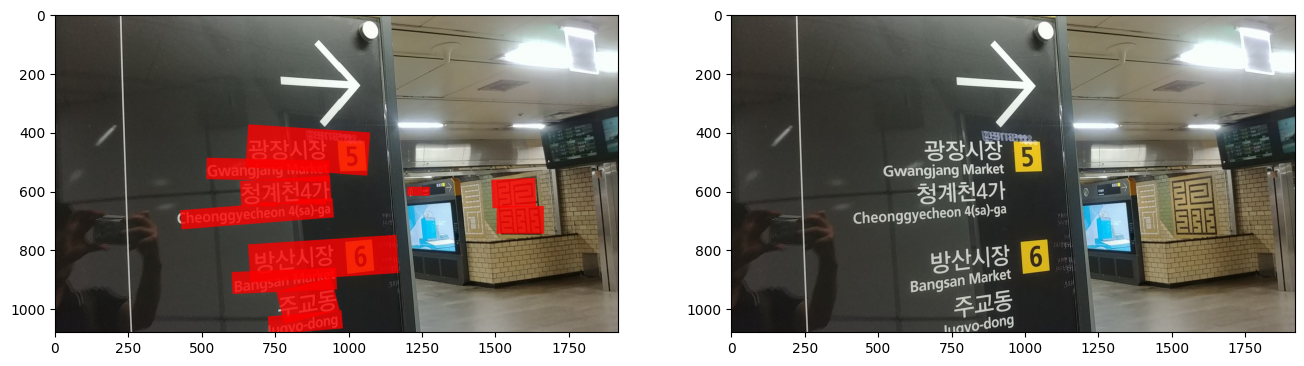

In [28]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from mmocr.apis import TextDetInferencer

img = '/content/temp-sign/kaggle_ko_sign/Temp/temp_Sign/00BC7EFF313A80D265D56268ACC77055.jpg'
checkpoint = '/content/work_dirs/test/epoch_10.pth'
cfg_file = '/content/mmocr/configs/textdet/panet/panet_resnet18_fpem-ffm_600e_icdar2015.py'

infer = TextDetInferencer(cfg_file, checkpoint)
result = infer(img, return_vis=True)

# print(f'result: {result["predictions"]}' )
# ex = [round(x) for x in result["predictions"][0]["polygons"][0]]
# print(f'result: {ex}')

fig, ax = plt.subplots(1,2,figsize=(16,10))
ax[0].imshow(result['visualization'][0])
img = cv2.imread(img)
ax[1].imshow(np.asarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)))
plt.show()